
# Data-Generating Processes (DGP) — Prompt-Based Lab (Simple Linear Regression)

**Course goal for today:** Understand and *simulate* simple data-generating processes (DGPs) so you can *see* how model assumptions create the data you analyze.

**Core template:** $Y = \alpha + \beta X + \varepsilon$, where $\varepsilon \sim \mathcal{N}(0, \sigma^2)$.

We will **ask an AI assistant to write most of the code**, but *you* will interpret the outputs, connect them to financial/economic meaning, and visualize residuals and fit quality before we run any formal estimation.


In [1]:

# --- Setup imports (feel free to add to this as needed) ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# set a default style if you like (matplotlib only; no seaborn)
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True



> ### LLM Usage Reminder
> - You may ask your favorite AI to generate code.  
> - **Document** the prompt(s) you used in each section (copy/paste them under the "LLM Appendix" line).  
> - You are responsible for understanding and verifying any code you use.



---
## Part 1 — Build a Simple DGP (continuous X, continuous Y)

We start with a simple linear DGP:

$Y = \alpha + \beta X + \varepsilon, \quad \varepsilon \sim \mathcal{N}(0, \sigma^2).$

Ask your AI to **choose** meaningful economic interpretations for \(X\) and \(Y\) (e.g., *X = weekly market return, Y = stock return*), and to pick values for \(\alpha, \beta, \sigma\).

**Prompt for your AI (copy & edit):**
> Generate Python code that simulates **200 observations** in a pandas DataFrame with columns `X` and `Y`, where `Y = alpha + beta*X + epsilon`, `epsilon ~ Normal(0, sigma^2)`. **Choose** `alpha`, `beta`, and `sigma` and provide a one-sentence **economic meaning** for `X` and `Y`. Return a DataFrame named **`df`** and store the chosen parameters in variables **`alpha`**, **`beta`**, **`sigma`**.

**LLM Appendix (your prompt):** I took a screen shot of part 1 and submitted it to chat gpt.


In [ ]:

# Paste or run the AI-generated simulation code here.
# Expected outputs: a DataFrame named `df` with columns `X`, `Y`
# and scalars: alpha, beta, sigma
df = pd.DataFrame()  # placeholder so later cells don't error if you run everything at once
# alpha = ...
# beta  = ...
# sigma = ...
df.head()


In [2]:
#Actual code used from chatgpt
import numpy as np
import pandas as pd

# --- Economic meaning (one sentence) ---
meaning = ("X is the weekly market return (%), and Y is the weekly return (%) "
           "of a particular stock; alpha is the stock’s abnormal return, "
           "beta is its market sensitivity, and sigma is idiosyncratic volatility.")

# --- Chosen parameters ---
alpha = 0.10   # percent weekly abnormal return
beta  = 1.20   # stock's market beta
sigma = 2.00   # percent idiosyncratic volatility (std dev of epsilon)

# --- Simulate data ---
np.random.seed(42)
n = 200

# Market returns tend to center near 0 with ~1–2% weekly volatility
X = np.random.normal(loc=0.0, scale=1.5, size=n)        # weekly market return (%)
epsilon = np.random.normal(loc=0.0, scale=sigma, size=n)

Y = alpha + beta * X + epsilon

# --- Return DataFrame named df ---
df = pd.DataFrame({"X": X, "Y": Y})

print(meaning)
df.head()


X is the weekly market return (%), and Y is the weekly return (%) of a particular stock; alpha is the stock’s abnormal return, beta is its market sensitivity, and sigma is idiosyncratic volatility.


,X,Y
0,0.745071,1.709660
1,-0.207396,0.972693
2,0.971533,3.431942
3,2.284545,4.949058
4,-0.351230,-3.076815



### 1.A — Describe the Data
- Show `df.info()`, summary statistics, and brief narrative on the economic meaning.
- Confirm `len(df)` is 200 and that `X` is continuous.

**Interpretation (answer in 2–3 sentences):**  
_What do the summary stats tell you about the scale of `X` and `Y`, and how does that relate to the chosen `alpha`, `beta`, and `sigma`?_  
The statistics show that market returns are right around zero with std (volatility of 1.4%), while stock returns have a much higher volativity but a slightly higher mean. This aligns with our parameter choices: a positive alpha (0.10) shifts Y slightly above zero, a beta above one (1.2) magnifies the market swings, and sigma (2.0) adds extra idiosyncratic volatility. Overall, the data scale reflects a stock that is riskier than the market but has a small positive expected excess return.


In [3]:

# Your code: basic EDA
df.info()
display(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       200 non-null    float64
 1   Y       200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


,X,Y
count,200.000000,200.000000
mean,-0.061156,0.198349
std,1.396506,2.708235
min,-3.929618,-8.373938
25%,-1.057692,-1.703661
50%,-0.006288,0.330312
75%,0.751279,1.893278
max,4.080254,8.782071



### 1.B — Visualize the True Line and Residuals (graphical "fit" without estimation)

We will **not** estimate a regression yet. Instead, use the **true** line \(\hat{Y} = \alpha + \beta X\) and draw **vertical segments** from each point to this line to represent residuals (\(\varepsilon\)).


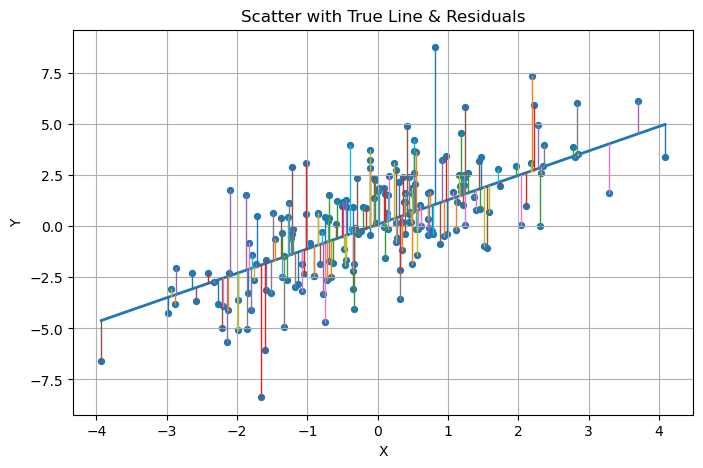

In [7]:

# Helper: plot scatter with true line and vertical residual segments
def plot_scatter_with_residuals(df, alpha, beta, title="Scatter with True Line & Residuals"):
    assert {"X","Y"}.issubset(df.columns), "df must have X and Y"
    x = df["X"].values
    y = df["Y"].values
    y_hat = alpha + beta * x

    fig, ax = plt.subplots()
    ax.scatter(x, y, s=18)
    # plot true line
    xs = np.linspace(x.min(), x.max(), 200)
    ax.plot(xs, alpha + beta * xs, linewidth=2)
    # vertical residuals
    for xi, yi, yhi in zip(x, y, y_hat):
        ax.plot([xi, xi], [min(yi, yhi), max(yi, yhi)], linewidth=1)
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    plt.show()

# Run the plot (uncomment after alpha, beta exist)
plot_scatter_with_residuals(df, alpha, beta)



**Interpretation (answer in 2–3 sentences):**  
_As \(\sigma\) grows, what happens to the typical length of the vertical segments? How does the "tightness" around the line change?_  
As sigma increases, the lenght of the vertical segment also increases, since the random noice around the line becomes larger. This makes the scatter of points less tightly clustered around the line and widens the overall spread of Y for a given X. In contrast, when sigma is small, the residuals shrink and the data hugs the line much more closely, indicating a “tighter” fit.




---
## Part 2 — Error Variance and Visual Goodness-of-Fit

Keep \(\alpha\) and \(\beta\) the same, but generate **two datasets** with different \(\sigma\) (e.g., small vs large). Plot them side by side with the **true** line and residual segments.

**Prompt for your AI (copy & edit):**
> Starting from the previous simulation, generate `df_low` and `df_high` with the **same** `alpha` and `beta` but different `sigma` (e.g., `sigma_low`, `sigma_high`). Create side-by-side plots calling `plot_scatter_with_residuals(...)` for each. Use 200 observations each.


In [ ]:

# Paste AI-generated code here to create df_low, df_high (same alpha/beta, different sigma)
# Example structure (you can overwrite):
# df_low = ...
# df_high = ...
# plot_scatter_with_residuals(df_low, alpha, beta, title="Low sigma")
# plot_scatter_with_residuals(df_high, alpha, beta, title="High sigma")


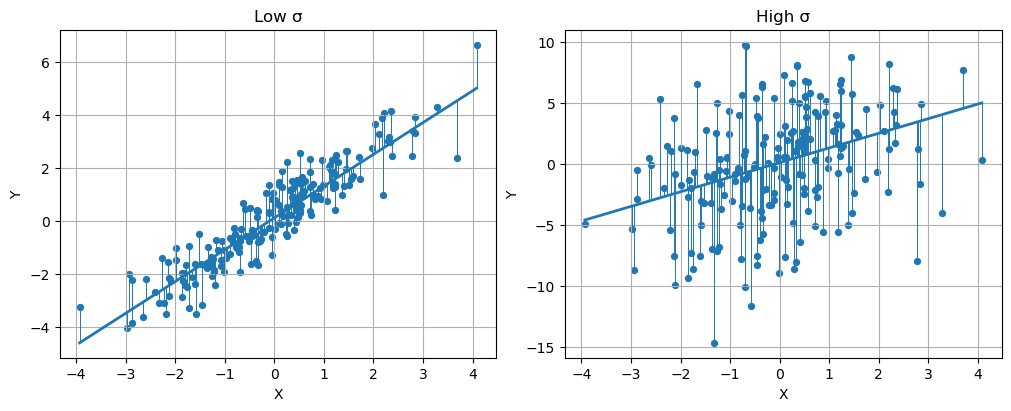

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- parameters (reuse yours if already defined) ---
alpha = alpha if "alpha" in globals() else 0.10
beta  = beta  if "beta"  in globals() else 1.20
sigma_low, sigma_high = 0.8, 4.0
n = 200

# --- use the same X for both datasets so the only difference is sigma ---
if "df" in globals() and "X" in df.columns and len(df)==n:
    X = df["X"].to_numpy()
else:
    rng = np.random.default_rng(42)
    X = rng.normal(0.0, 1.5, size=n)

rng = np.random.default_rng(123)

# low-sigma data
eps_low  = rng.normal(0.0, sigma_low, size=n)
Y_low    = alpha + beta * X + eps_low
df_low   = pd.DataFrame({"X": X, "Y": Y_low})

# high-sigma data
eps_high = rng.normal(0.0, sigma_high, size=n)
Y_high   = alpha + beta * X + eps_high
df_high  = pd.DataFrame({"X": X, "Y": Y_high})

# --- side-by-side plot with true line and residual segments ---
def plot_one(ax, X, Y, alpha, beta, title):
    yhat = alpha + beta * X
    ax.scatter(X, Y, s=18)
    xs = np.linspace(X.min(), X.max(), 200)
    ax.plot(xs, alpha + beta * xs, linewidth=2)
    ax.vlines(X, Y, yhat, linewidth=0.7)
    ax.set_title(title)
    ax.set_xlabel("X"); ax.set_ylabel("Y")

fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plot_one(axes[0], df_low["X"].to_numpy(),  df_low["Y"].to_numpy(),  alpha, beta, "Low σ")
plot_one(axes[1], df_high["X"].to_numpy(), df_high["Y"].to_numpy(), alpha, beta, "High σ")
plt.show()



**Interpretation (answer in 2–3 sentences):**  
_Which dataset appears to have better "fit" and why? How does this visual notion connect to the idea that higher noise lowers goodness-of-fit (like lower \(R^2\))?_  
The dataset with low sigma shows a much tighter clustering of points around the true line, and as such a better "fit." The high sigma dataset has large residuals, so the line explains less of the variation in Y. This visual intuition connects directly to the idea that higher noise reduces the proportion of variance explained, which corresponds to a lower R^2 in regression.



---
## Part 3 — Discrete X, Continuous Y (Means-as-Regression)

Let \(X\) be **binary** (0/1). Generate data from \(Y = \alpha + \beta X + \varepsilon\). In this case, a regression of `Y ~ X` (with X binary) is equivalent to **comparing group means** (treatment vs control).

**Prompt for your AI (copy & edit):**
> Simulate 200 observations where `X` is binary (0/1) with about half ones. Generate `Y = alpha + beta*X + epsilon`, epsilon ~ Normal(0, sigma^2). Return a DataFrame `df_bin` and compute the mean of `Y` for X=0 and X=1. Also create a bar chart with the two means and error bars (standard errors of the mean).


In [ ]:

# Paste AI-generated simulation for binary X here, name the output df_bin
# Then compute group means and plot a simple bar chart of means with error bars
# Example skeleton:
# means = df_bin.groupby("X")["Y"].mean()
# ses   = df_bin.groupby("X")["Y"].sem()
# fig, ax = plt.subplots()
# ax.bar([0,1], means.values, yerr=ses.values, capsize=4)
# ax.set_xticks([0,1]); ax.set_xticklabels(["X=0","X=1"])
# ax.set_ylabel("Mean of Y")
# plt.show()


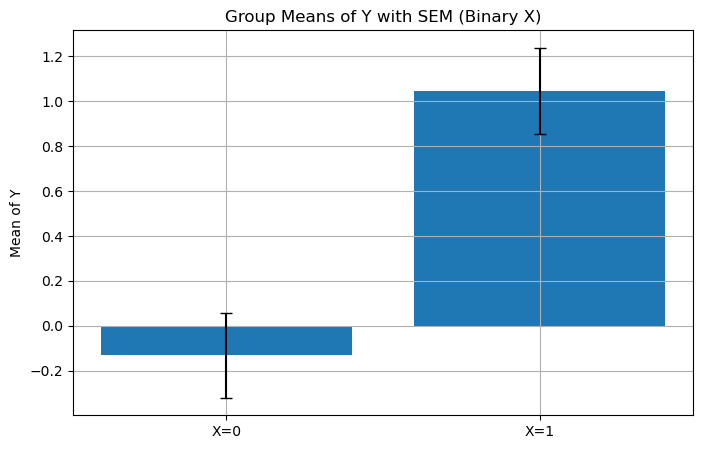

Mean(Y|X=1) - Mean(Y|X=0) = 1.178


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- parameters (reuse if already defined) ---
alpha = alpha if "alpha" in globals() else 0.10
beta  = beta  if "beta"  in globals() else 1.20
sigma = sigma if "sigma" in globals() else 2.00
n = 200
rng = np.random.default_rng(7)

# --- simulate binary X and Y ---
Xb = rng.integers(0, 2, size=n)              # Bernoulli(0.5)
eps = rng.normal(0.0, sigma, size=n)
Yb  = alpha + beta * Xb + eps

df_bin = pd.DataFrame({"X": Xb, "Y": Yb})

# --- group means and standard errors of the mean (SEM) ---
means = df_bin.groupby("X")["Y"].mean()
sems  = df_bin.groupby("X")["Y"].sem()

# --- bar chart with error bars ---
fig, ax = plt.subplots()
ax.bar([0, 1], means.values, yerr=sems.values, capsize=4)
ax.set_xticks([0, 1])
ax.set_xticklabels(["X=0", "X=1"])
ax.set_ylabel("Mean of Y")
ax.set_title("Group Means of Y with SEM (Binary X)")
plt.show()

# (optional) print the difference in means (should be close to beta)
diff_in_means = means.loc[1] - means.loc[0]
print(f"Mean(Y|X=1) - Mean(Y|X=0) = {diff_in_means:.3f}")


**Interpretation (answer in 2–3 sentences):**  
_What does \(\beta\) represent when \(X\) is binary? How is it related to the difference in average \(Y\) between the two groups?_  
When X is binary, beta just tells us how much higher (or lower) the average outcome is for the group with X=1 compared to the group with X=0. In this case, the bar chart shows that the “treatment” group’s mean Y is about 1.18 units higher than the “control” group’s mean. So beta is simply the gap in average outcomes between the two groups.




---
## Part 4 — Simple RCT (No Other Covariates)

Construct a **randomized** assignment to treatment: $X=1$ for treated units and $X=0$ for control. Generate $Y = \alpha + \beta X + \varepsilon$. With random assignment and no other covariates, $\beta$ can be interpreted as the **Average Treatment Effect (ATE)**.

**Prompt for your AI (copy & edit):**
> Simulate an RCT with 200 observations: randomly assign X in {0,1} with equal probability; generate Y = alpha + beta*X + epsilon. Compute the group means of Y and the difference-in-means (X=1 minus X=0). Plot a bar chart of group means. Use variables `alpha`, `beta`, `sigma` for consistency.


Difference-in-means (X=1 minus X=0) = 1.291


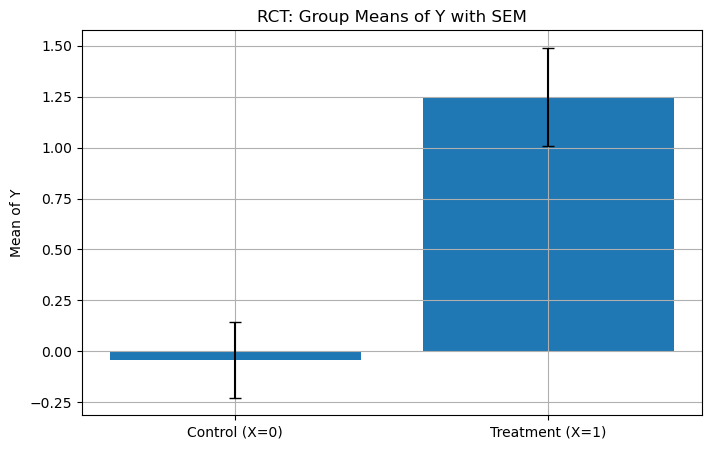

In [10]:

# Paste AI-generated code here to simulate an RCT and compute group means and difference-in-means
# Then plot a bar chart of the group meansimport numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- reuse prior parameters if present; otherwise set defaults ---
alpha = alpha if "alpha" in globals() else 0.10
beta  = beta  if "beta"  in globals() else 1.20
sigma = sigma if "sigma" in globals() else 2.00
n = 200
rng = np.random.default_rng(2025)

# --- RCT: random assignment 50/50 ---
X = rng.integers(0, 2, size=n)                       # 0 or 1 with equal prob
eps = rng.normal(0.0, sigma, size=n)
Y = alpha + beta * X + eps
df_rct = pd.DataFrame({"X": X, "Y": Y})

# --- group means, SEMs, and diff-in-means (ATE estimate) ---
means = df_rct.groupby("X")["Y"].mean()
sems  = df_rct.groupby("X")["Y"].sem()
ate_hat = means.loc[1] - means.loc[0]
print(f"Difference-in-means (X=1 minus X=0) = {ate_hat:.3f}")

# --- bar chart with error bars ---
fig, ax = plt.subplots()
ax.bar([0,1], means.values, yerr=sems.values, capsize=4)
ax.set_xticks([0,1]); ax.set_xticklabels(["Control (X=0)","Treatment (X=1)"])
ax.set_ylabel("Mean of Y")
ax.set_title("RCT: Group Means of Y with SEM")
plt.show()



**Interpretation (answer in 2–3 sentences):**  
_If you obtained \(\beta = 5\), how would you explain this in words as an average treatment effect?_  
If beta=5, it means that on average the treatment group’s outcome Y is five units higher than the control group’s outcome. In other words, receiving the treatment causes an average increase of 5 relative to not receiving it. This is the average treatment effect (ATE) because random assignment ensures that the only systematic difference between the two groups is the treatment itself.